# ML TRAINING SET

In [120]:
import pandas as pd
import os
import time
import numpy as np
from datetime import date, timedelta, datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import array
import math

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [121]:
db = 'https://raw.githubusercontent.com/GianlucaSimionato/Time_Series/main/DB.csv'

In [122]:
df_orig = pd.read_csv(db, sep = ';', decimal = ',')

In [123]:
df_orig['YEAR'] = df_orig['DATE_TIME'].str[:4]
df_orig['MONTH'] = df_orig['DATE_TIME'].str[5:7]
df_orig['DAY'] = df_orig['DATE_TIME'].str[8:]

In [124]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE_TIME      17544 non-null  object 
 1   VALORE         17544 non-null  float64
 2   dummy_holiday  17544 non-null  float64
 3   dummy_Covid    17544 non-null  float64
 4   YEAR           17544 non-null  object 
 5   MONTH          17544 non-null  object 
 6   DAY            17544 non-null  object 
dtypes: float64(3), object(4)
memory usage: 959.6+ KB


In [125]:
df_orig['DATE_TIME'] = pd.to_datetime(df_orig['DATE_TIME'])

In [126]:
df_24 = df_orig[['DATE_TIME', 'VALORE']]
df_24 = df_24.set_index('DATE_TIME')
df_24.columns=['Y']
df_24['Hour'] = df_24.index.hour 

In [127]:
df_c = df_24.copy()
df_24 = df_24.loc[:'2020-04-07']

In [128]:
mySeries = []
namesofMySeries = []
list_hour = list(range(0,24))
list_df = [pd.DataFrame() for x in range(24)]
for i in list_hour:
    list_df[i] = df_24[df_24['Hour'] == i][['Y']]
    mySeries.append(list_df[i])
    namesofMySeries.append(list_hour[i])

In [129]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0] 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [130]:
time_step = 100

In [143]:
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step,1)))
model.add(Dropout(0.5))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss = 'mean_absolute_error', optimizer='adam')

In [144]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_22 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
dropout_14 (Dropout)         (None, 100, 100)          0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 100, 50)           30200     
_________________________________________________________________
lstm_24 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 91,251
Trainable params: 91,251
Non-trainable params: 0
__________________________________________________

In [145]:
list_test = [[] for x in range(24)]
list_train = [[] for x in range(24)]
Series_prev = [[] for x in range(24)]

In [146]:
d1 = datetime.strptime('2020-04-08', "%Y-%m-%d")
d2 = datetime.strptime('2020-09-01', "%Y-%m-%d")
deltad = abs((d2 - d1).days)

In [147]:
epoche = 30
n_steps = time_step
batch = 30

=============================================== HH 0 ===============================================
Epoch 1/30
13/13 [==============================] - 3s 257ms/step - loss: 0.1164 - val_loss: 0.0579
Epoch 2/30
13/13 [==============================] - 2s 151ms/step - loss: 0.0862 - val_loss: 0.0557
Epoch 3/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0760 - val_loss: 0.0222
Epoch 4/30
13/13 [==============================] - 2s 151ms/step - loss: 0.0770 - val_loss: 0.0195
Epoch 5/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0818 - val_loss: 0.0189
Epoch 6/30
13/13 [==============================] - 2s 149ms/step - loss: 0.0792 - val_loss: 0.0199
Epoch 7/30
13/13 [==============================] - 2s 150ms/step - loss: 0.0717 - val_loss: 0.0198
Epoch 8/30
13/13 [==============================] - 2s 151ms/step - loss: 0.0714 - val_loss: 0.0197
Epoch 9/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0681 - val_loss: 0.0191

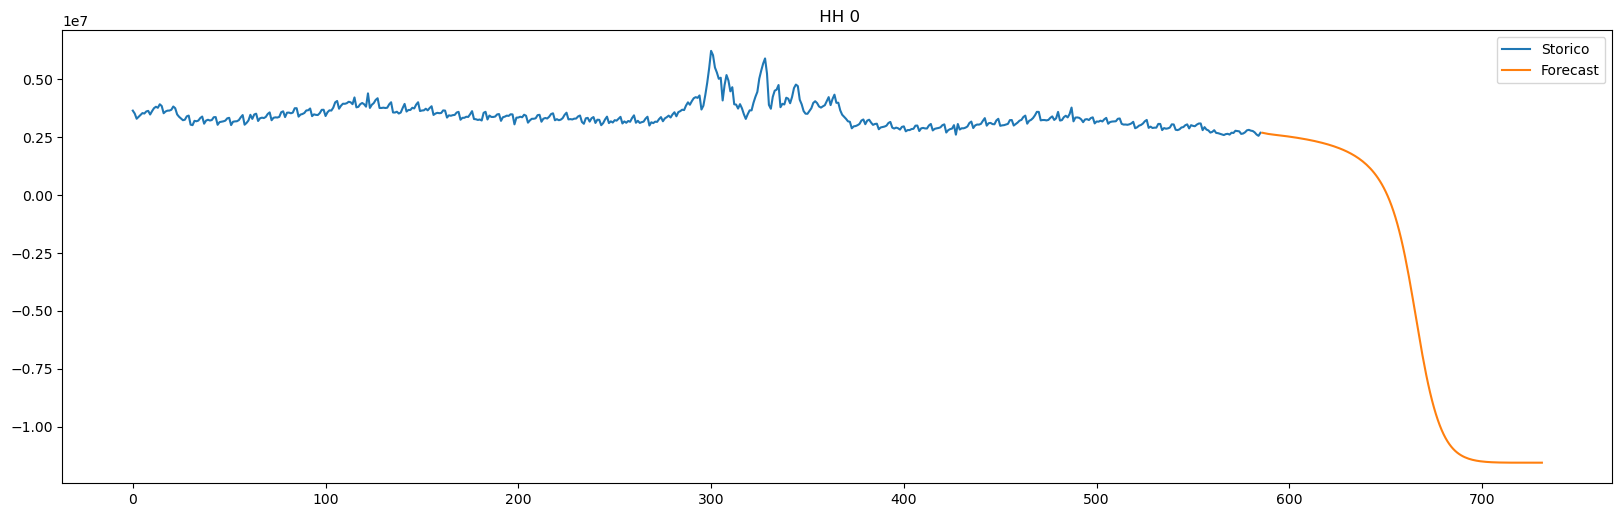

=============================================== HH 1 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 159ms/step - loss: 0.0586 - val_loss: 0.0257
Epoch 2/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0642 - val_loss: 0.0218
Epoch 3/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0601 - val_loss: 0.0192
Epoch 4/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0581 - val_loss: 0.0194
Epoch 5/30
13/13 [==============================] - 2s 157ms/step - loss: 0.0569 - val_loss: 0.0193
Epoch 6/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0623 - val_loss: 0.0192
Epoch 7/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0602 - val_loss: 0.0207
Epoch 8/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0579 - val_loss: 0.0184
Epoch 9/30
13/13 [==============================] - 2s 157ms/step - loss: 0.0565 - val_loss: 0.0193

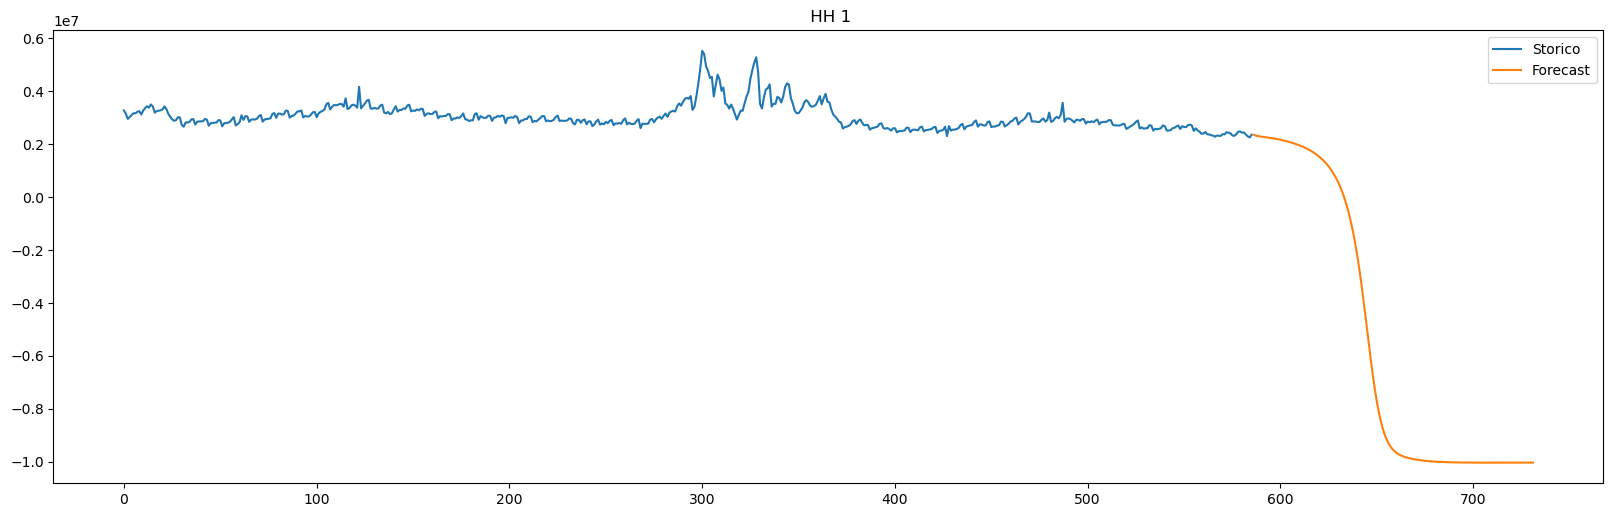

=============================================== HH 2 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 158ms/step - loss: 0.0495 - val_loss: 0.0201
Epoch 2/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0494 - val_loss: 0.0251
Epoch 3/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0489 - val_loss: 0.0221
Epoch 4/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0469 - val_loss: 0.0208
Epoch 5/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0485 - val_loss: 0.0211
Epoch 6/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0483 - val_loss: 0.0210
Epoch 7/30
13/13 [==============================] - 2s 151ms/step - loss: 0.0501 - val_loss: 0.0201
Epoch 8/30
13/13 [==============================] - 2s 151ms/step - loss: 0.0470 - val_loss: 0.0199
Epoch 9/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0467 - val_loss: 0.0209

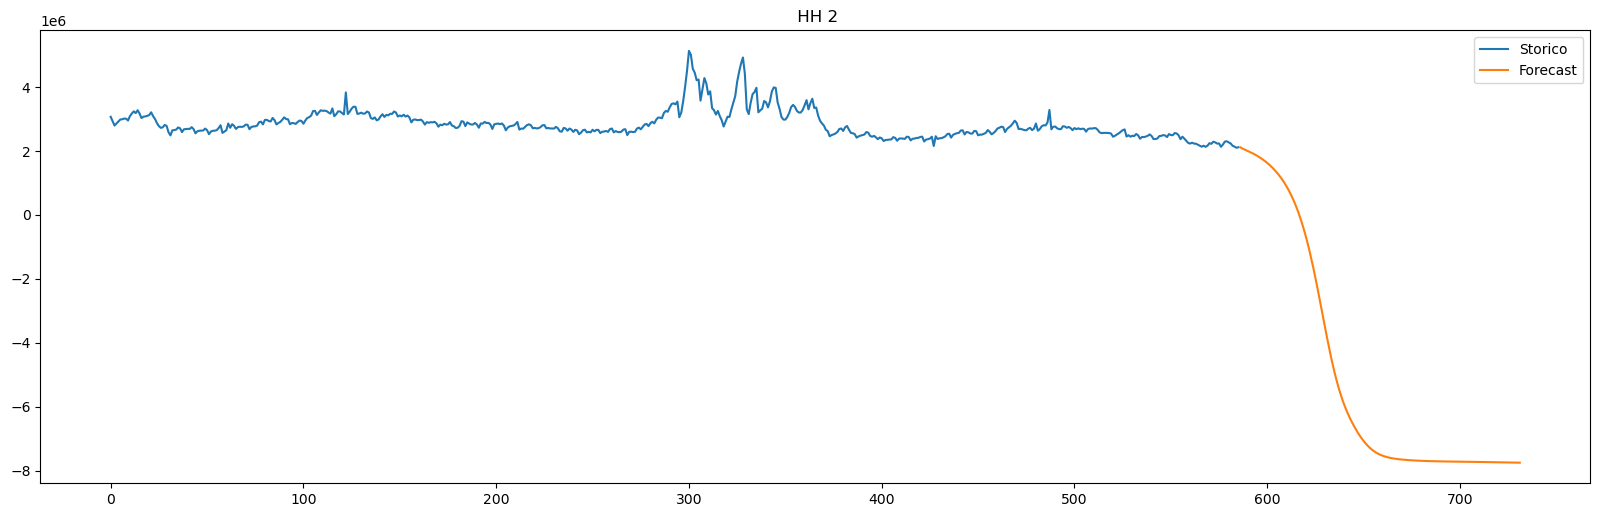

=============================================== HH 3 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 160ms/step - loss: 0.0452 - val_loss: 0.0255
Epoch 2/30
13/13 [==============================] - 2s 160ms/step - loss: 0.0422 - val_loss: 0.0254
Epoch 3/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0384 - val_loss: 0.0250
Epoch 4/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0412 - val_loss: 0.0245
Epoch 5/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0413 - val_loss: 0.0248
Epoch 6/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0422 - val_loss: 0.0247
Epoch 7/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0400 - val_loss: 0.0248
Epoch 8/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0407 - val_loss: 0.0259
Epoch 9/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0434 - val_loss: 0.0244

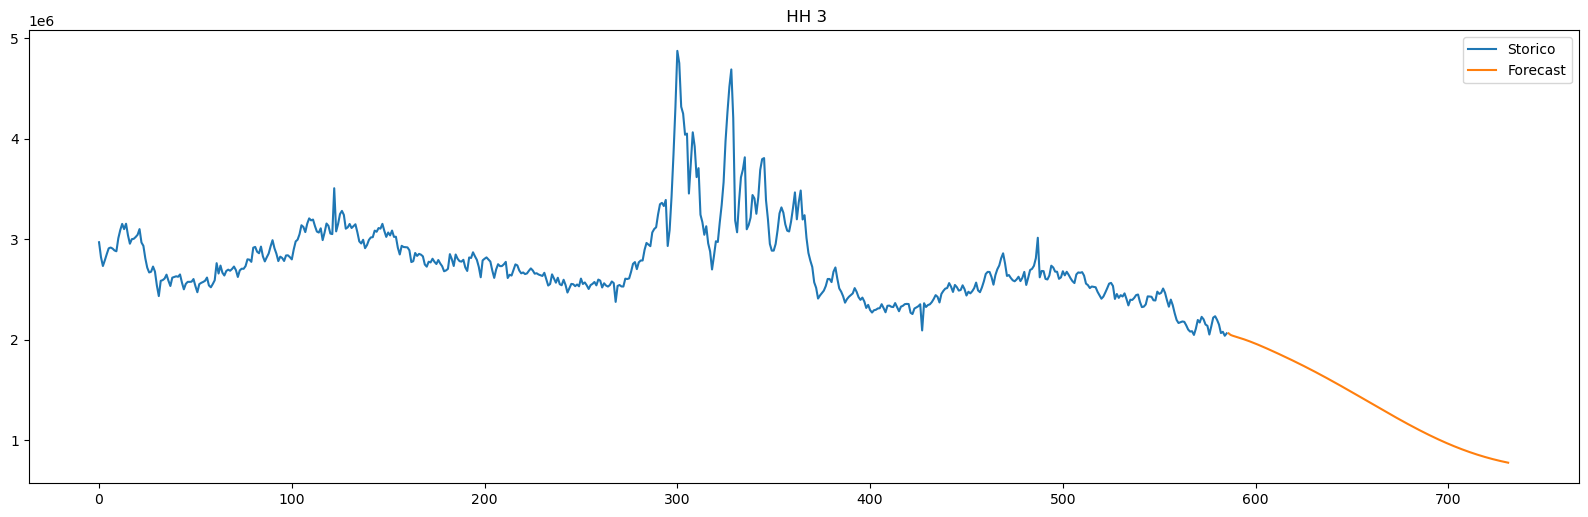

=============================================== HH 4 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 157ms/step - loss: 0.0391 - val_loss: 0.0299
Epoch 2/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0381 - val_loss: 0.0299
Epoch 3/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0381 - val_loss: 0.0299
Epoch 4/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0386 - val_loss: 0.0291
Epoch 5/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0395 - val_loss: 0.0295
Epoch 6/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0365 - val_loss: 0.0290
Epoch 7/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0407 - val_loss: 0.0291
Epoch 8/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0406 - val_loss: 0.0295
Epoch 9/30
13/13 [==============================] - 2s 151ms/step - loss: 0.0383 - val_loss: 0.0295

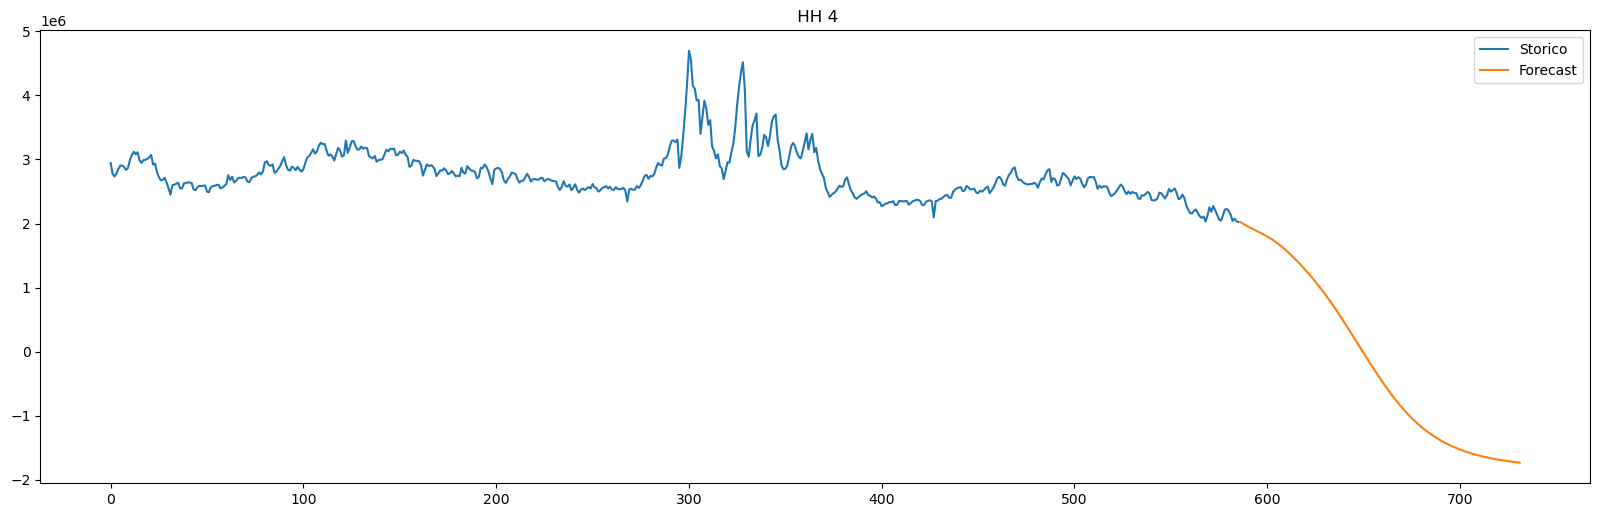

=============================================== HH 5 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0489 - val_loss: 0.0372
Epoch 2/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0495 - val_loss: 0.0366
Epoch 3/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0488 - val_loss: 0.0379
Epoch 4/30
13/13 [==============================] - 2s 157ms/step - loss: 0.0512 - val_loss: 0.0360
Epoch 5/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0482 - val_loss: 0.0354
Epoch 6/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0479 - val_loss: 0.0366
Epoch 7/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0485 - val_loss: 0.0367
Epoch 8/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0496 - val_loss: 0.0365
Epoch 9/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0480 - val_loss: 0.0359

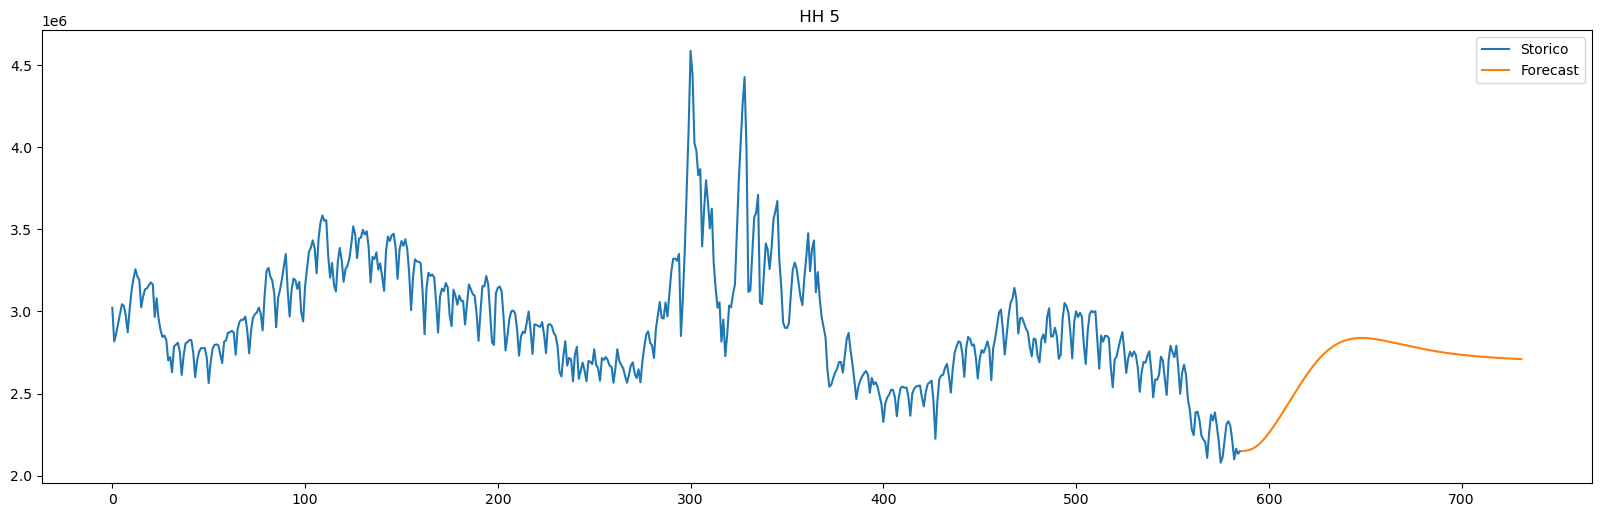

=============================================== HH 6 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 160ms/step - loss: 0.0959 - val_loss: 0.0497
Epoch 2/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0945 - val_loss: 0.0491
Epoch 3/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0959 - val_loss: 0.0480
Epoch 4/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0932 - val_loss: 0.0518
Epoch 5/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0926 - val_loss: 0.0551
Epoch 6/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0939 - val_loss: 0.0550
Epoch 7/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0946 - val_loss: 0.0494
Epoch 8/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0944 - val_loss: 0.0489
Epoch 9/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0916 - val_loss: 0.0495

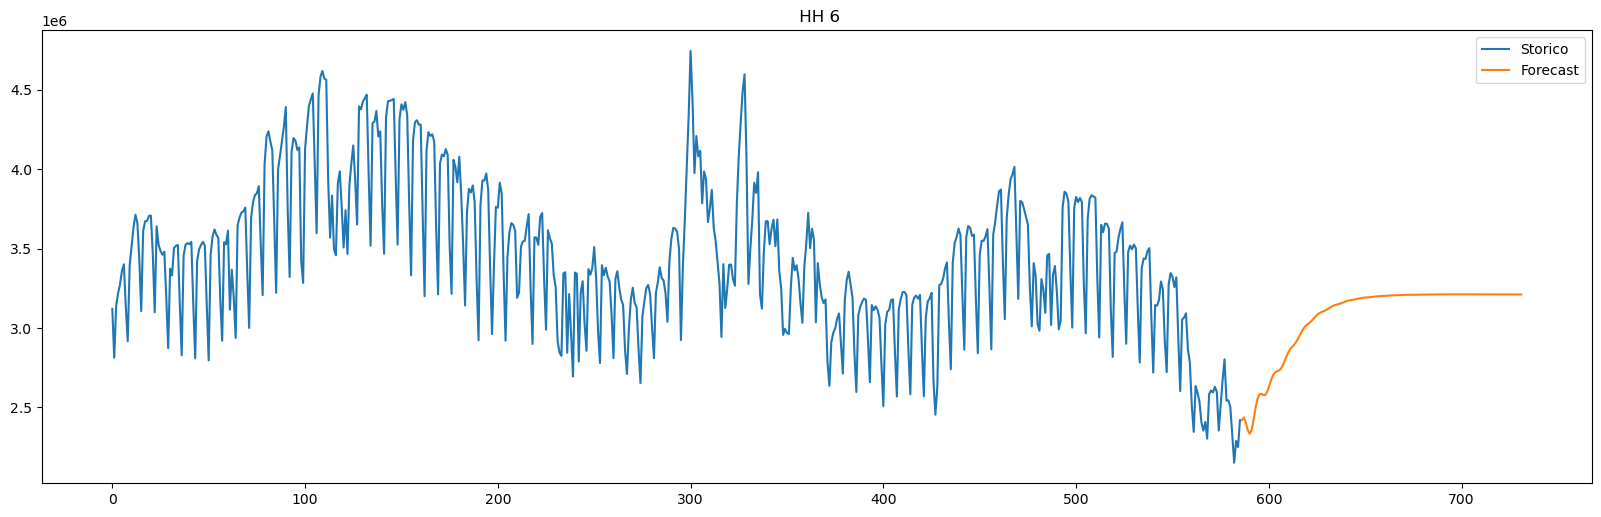

=============================================== HH 7 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 157ms/step - loss: 0.0974 - val_loss: 0.0448
Epoch 2/30
13/13 [==============================] - 2s 151ms/step - loss: 0.0995 - val_loss: 0.0587
Epoch 3/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0936 - val_loss: 0.0564
Epoch 4/30
13/13 [==============================] - 2s 149ms/step - loss: 0.0921 - val_loss: 0.0408
Epoch 5/30
13/13 [==============================] - 2s 151ms/step - loss: 0.0832 - val_loss: 0.0543
Epoch 6/30
13/13 [==============================] - 2s 150ms/step - loss: 0.0772 - val_loss: 0.0479
Epoch 7/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0779 - val_loss: 0.0459
Epoch 8/30
13/13 [==============================] - 2s 148ms/step - loss: 0.0743 - val_loss: 0.0484
Epoch 9/30
13/13 [==============================] - 2s 149ms/step - loss: 0.0768 - val_loss: 0.1086

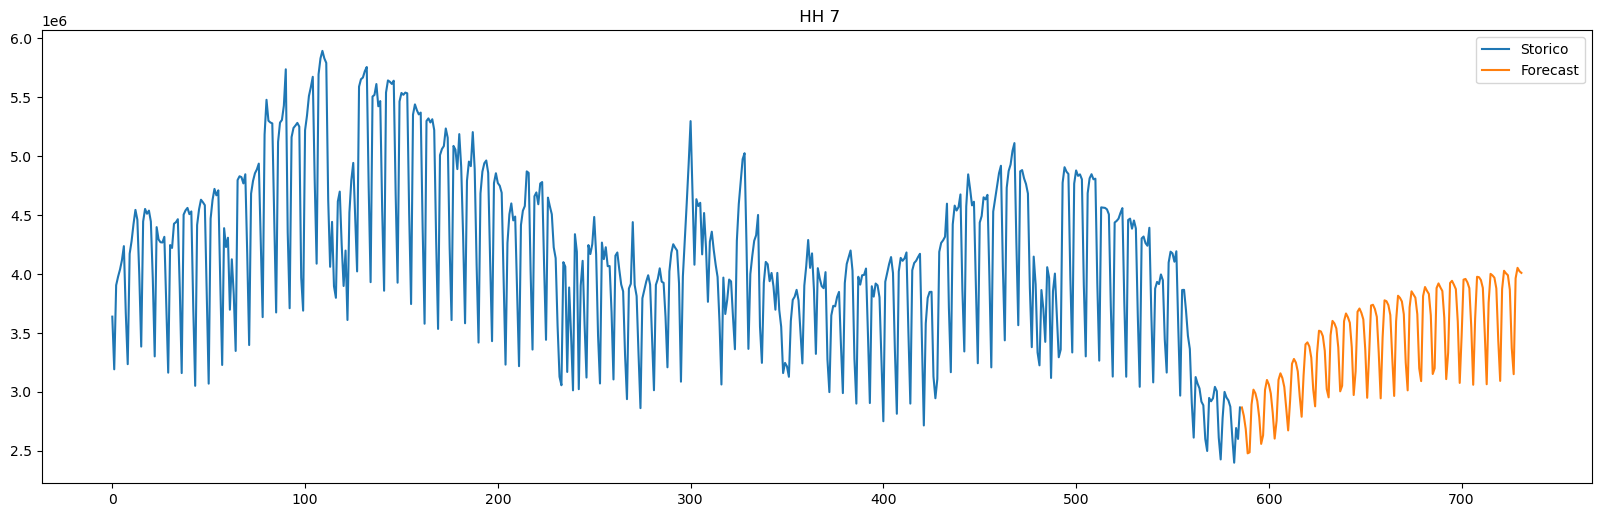

=============================================== HH 8 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 159ms/step - loss: 0.0655 - val_loss: 0.0496
Epoch 2/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0646 - val_loss: 0.0519
Epoch 3/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0632 - val_loss: 0.0782
Epoch 4/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0679 - val_loss: 0.0676
Epoch 5/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0589 - val_loss: 0.0502
Epoch 6/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0635 - val_loss: 0.0618
Epoch 7/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0582 - val_loss: 0.0615
Epoch 8/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0652 - val_loss: 0.0813
Epoch 9/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0611 - val_loss: 0.0877

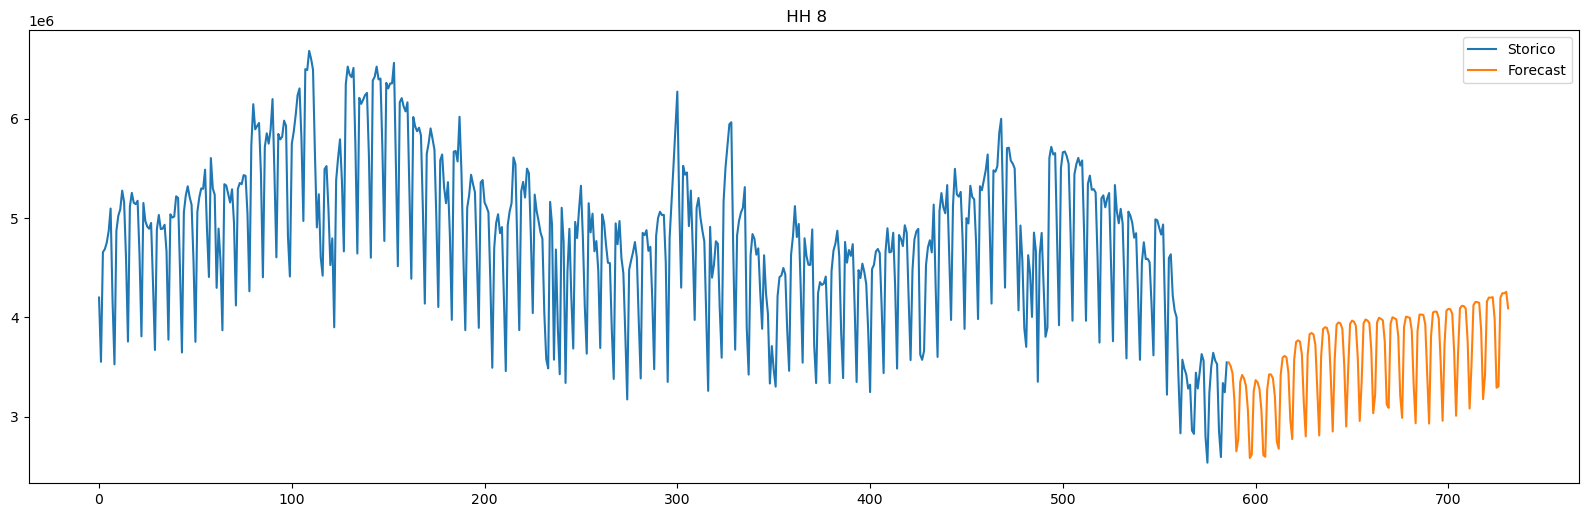

=============================================== HH 9 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 161ms/step - loss: 0.0686 - val_loss: 0.0707
Epoch 2/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0700 - val_loss: 0.0861
Epoch 3/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0705 - val_loss: 0.1130
Epoch 4/30
13/13 [==============================] - 2s 154ms/step - loss: 0.0699 - val_loss: 0.1076
Epoch 5/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0664 - val_loss: 0.0985
Epoch 6/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0671 - val_loss: 0.0863
Epoch 7/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0661 - val_loss: 0.0908
Epoch 8/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0648 - val_loss: 0.1365
Epoch 9/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0680 - val_loss: 0.1106

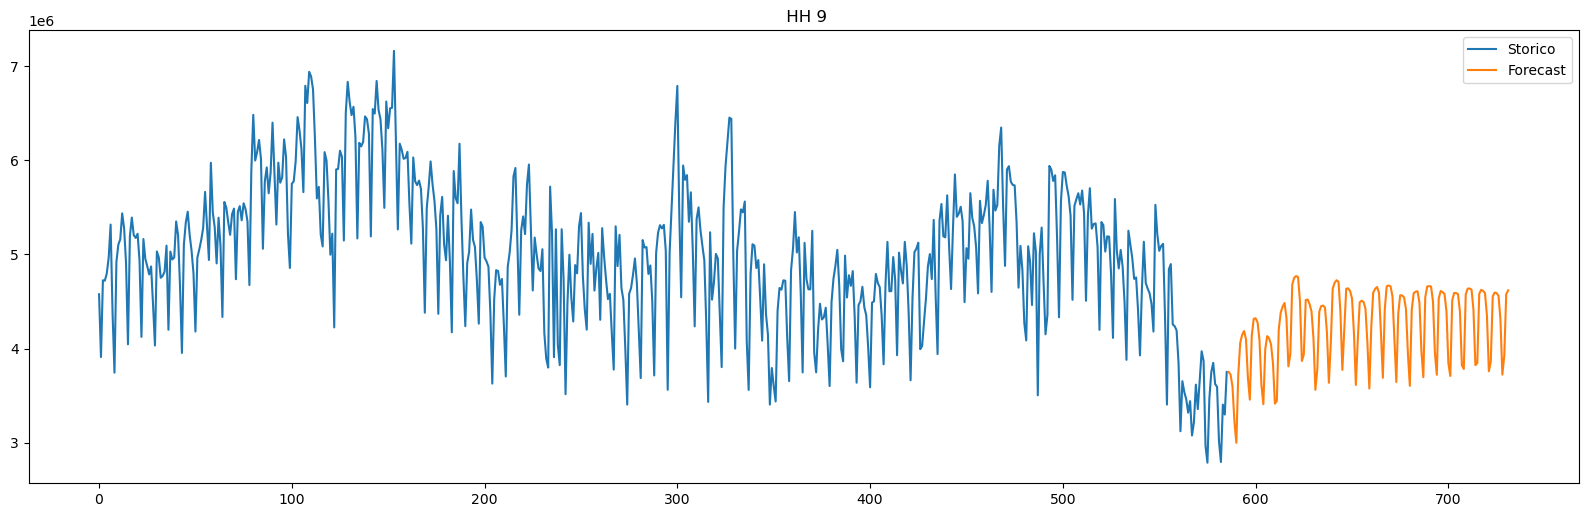

============================================== HH 10 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 159ms/step - loss: 0.0746 - val_loss: 0.1110
Epoch 2/30
13/13 [==============================] - 2s 151ms/step - loss: 0.0780 - val_loss: 0.1331
Epoch 3/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0773 - val_loss: 0.1148
Epoch 4/30
13/13 [==============================] - 2s 150ms/step - loss: 0.0765 - val_loss: 0.1262
Epoch 5/30
13/13 [==============================] - 2s 150ms/step - loss: 0.0773 - val_loss: 0.1169
Epoch 6/30
13/13 [==============================] - 2s 150ms/step - loss: 0.0769 - val_loss: 0.1335
Epoch 7/30
13/13 [==============================] - 2s 151ms/step - loss: 0.0754 - val_loss: 0.1140
Epoch 8/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0741 - val_loss: 0.1132
Epoch 9/30
13/13 [==============================] - 2s 149ms/step - loss: 0.0759 - val_loss: 0.1220

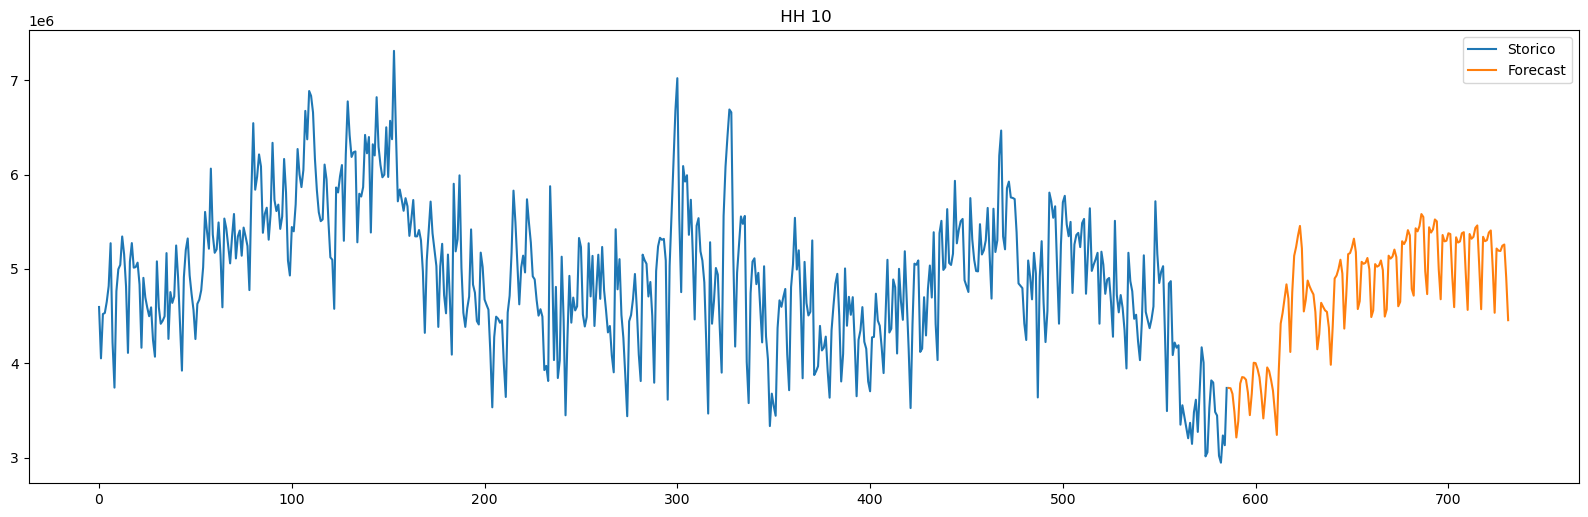

============================================== HH 11 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 160ms/step - loss: 0.0839 - val_loss: 0.1132
Epoch 2/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0828 - val_loss: 0.1545
Epoch 3/30
13/13 [==============================] - 2s 151ms/step - loss: 0.0831 - val_loss: 0.1292
Epoch 4/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0828 - val_loss: 0.1224
Epoch 5/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0841 - val_loss: 0.1292
Epoch 6/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0806 - val_loss: 0.1297
Epoch 7/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0841 - val_loss: 0.1414
Epoch 8/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0844 - val_loss: 0.1338
Epoch 9/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0804 - val_loss: 0.1075

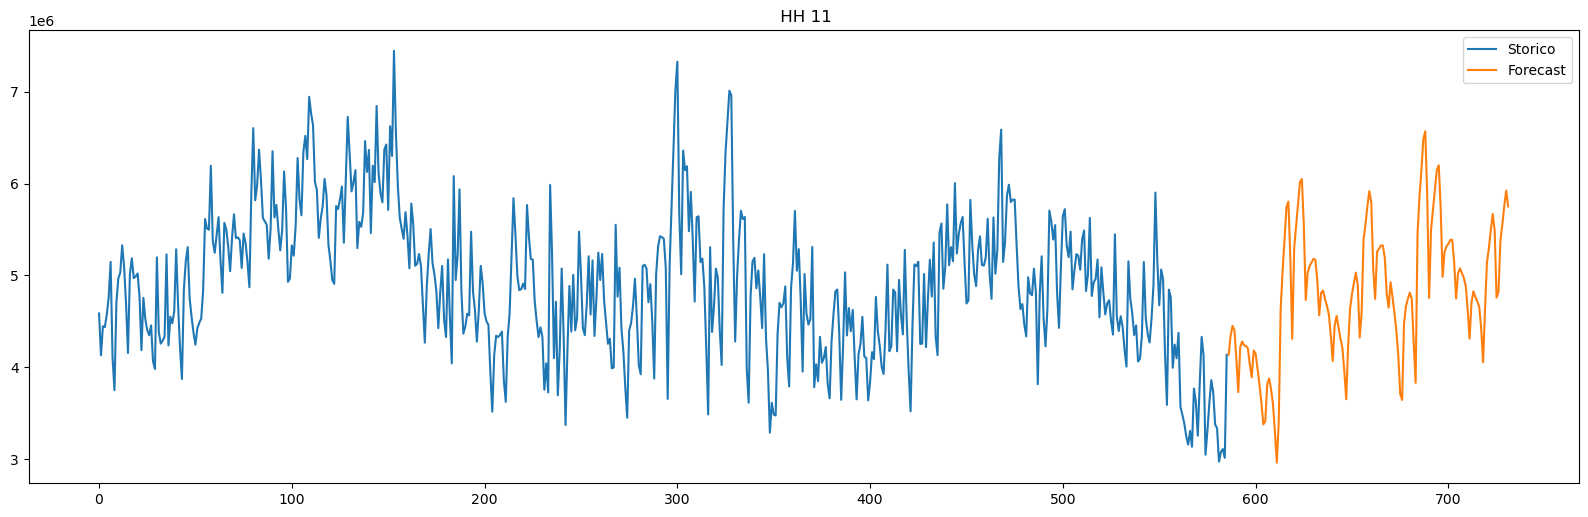

============================================== HH 12 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 165ms/step - loss: 0.0834 - val_loss: 0.0939
Epoch 2/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0810 - val_loss: 0.0972
Epoch 3/30
13/13 [==============================] - 2s 158ms/step - loss: 0.0845 - val_loss: 0.1086
Epoch 4/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0842 - val_loss: 0.1038
Epoch 5/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0845 - val_loss: 0.0864
Epoch 6/30
13/13 [==============================] - 2s 161ms/step - loss: 0.0839 - val_loss: 0.1008
Epoch 7/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0823 - val_loss: 0.1042
Epoch 8/30
13/13 [==============================] - 2s 159ms/step - loss: 0.0792 - val_loss: 0.0957
Epoch 9/30
13/13 [==============================] - 2s 157ms/step - loss: 0.0775 - val_loss: 0.0936

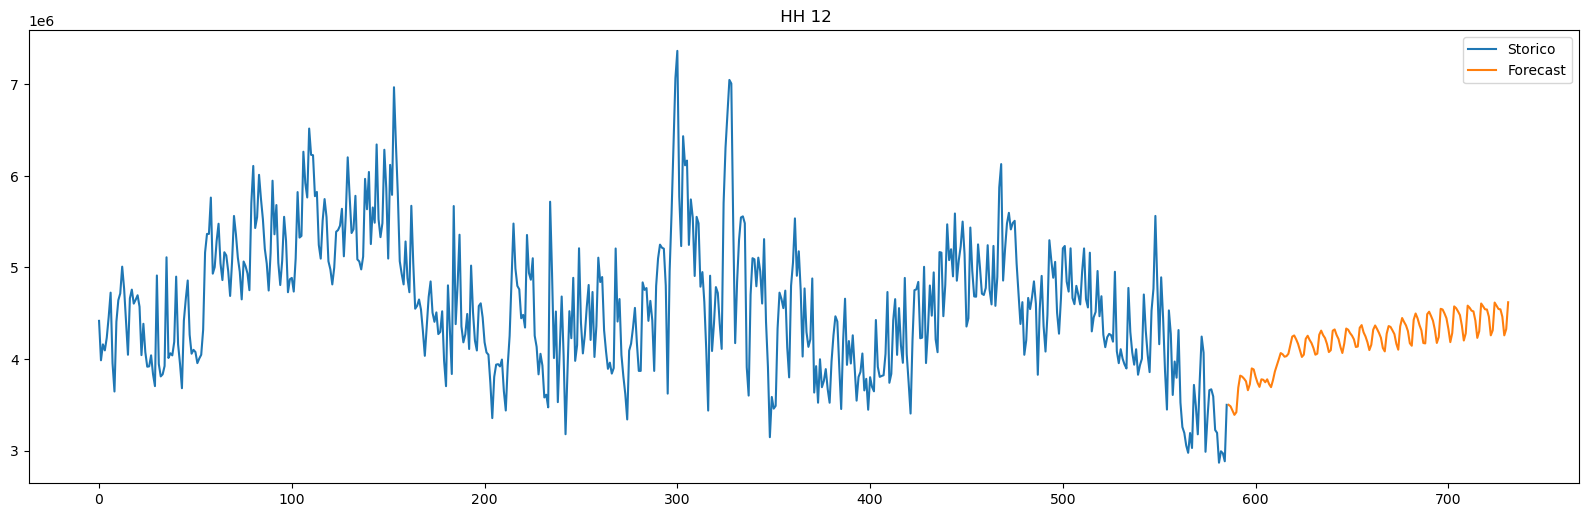

============================================== HH 13 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 164ms/step - loss: 0.0720 - val_loss: 0.0830
Epoch 2/30
13/13 [==============================] - 2s 158ms/step - loss: 0.0731 - val_loss: 0.0810
Epoch 3/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0711 - val_loss: 0.1063
Epoch 4/30
13/13 [==============================] - 2s 159ms/step - loss: 0.0725 - val_loss: 0.0880
Epoch 5/30
13/13 [==============================] - 2s 158ms/step - loss: 0.0729 - val_loss: 0.1107
Epoch 6/30
13/13 [==============================] - 2s 157ms/step - loss: 0.0688 - val_loss: 0.0912
Epoch 7/30
13/13 [==============================] - 2s 152ms/step - loss: 0.0708 - val_loss: 0.1400
Epoch 8/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0728 - val_loss: 0.0771
Epoch 9/30
13/13 [==============================] - 2s 153ms/step - loss: 0.0755 - val_loss: 0.0669

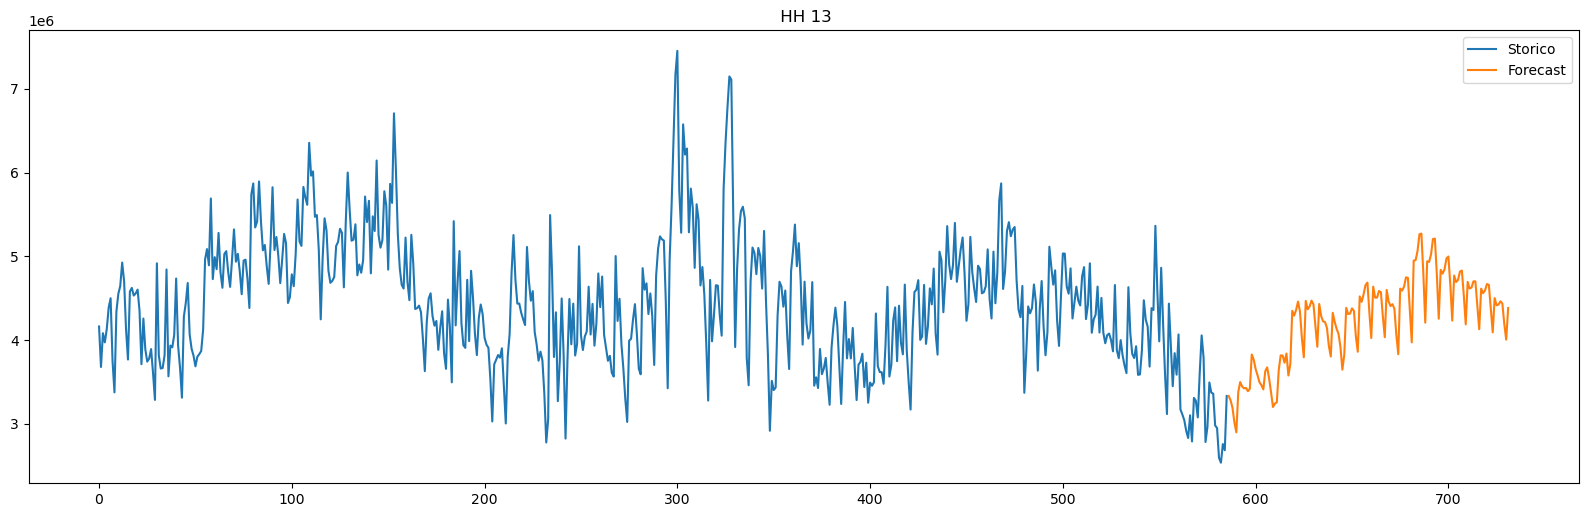

============================================== HH 14 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 167ms/step - loss: 0.0670 - val_loss: 0.0877
Epoch 2/30
13/13 [==============================] - 2s 155ms/step - loss: 0.0642 - val_loss: 0.0917
Epoch 3/30
13/13 [==============================] - 2s 159ms/step - loss: 0.0667 - val_loss: 0.1475
Epoch 4/30
13/13 [==============================] - 2s 157ms/step - loss: 0.0643 - val_loss: 0.1390
Epoch 5/30
13/13 [==============================] - 2s 157ms/step - loss: 0.0623 - val_loss: 0.0808
Epoch 6/30
13/13 [==============================] - 2s 159ms/step - loss: 0.0664 - val_loss: 0.0818
Epoch 7/30
13/13 [==============================] - 2s 159ms/step - loss: 0.0653 - val_loss: 0.0990
Epoch 8/30
13/13 [==============================] - 2s 162ms/step - loss: 0.0653 - val_loss: 0.1164
Epoch 9/30
13/13 [==============================] - 2s 158ms/step - loss: 0.0651 - val_loss: 0.1130

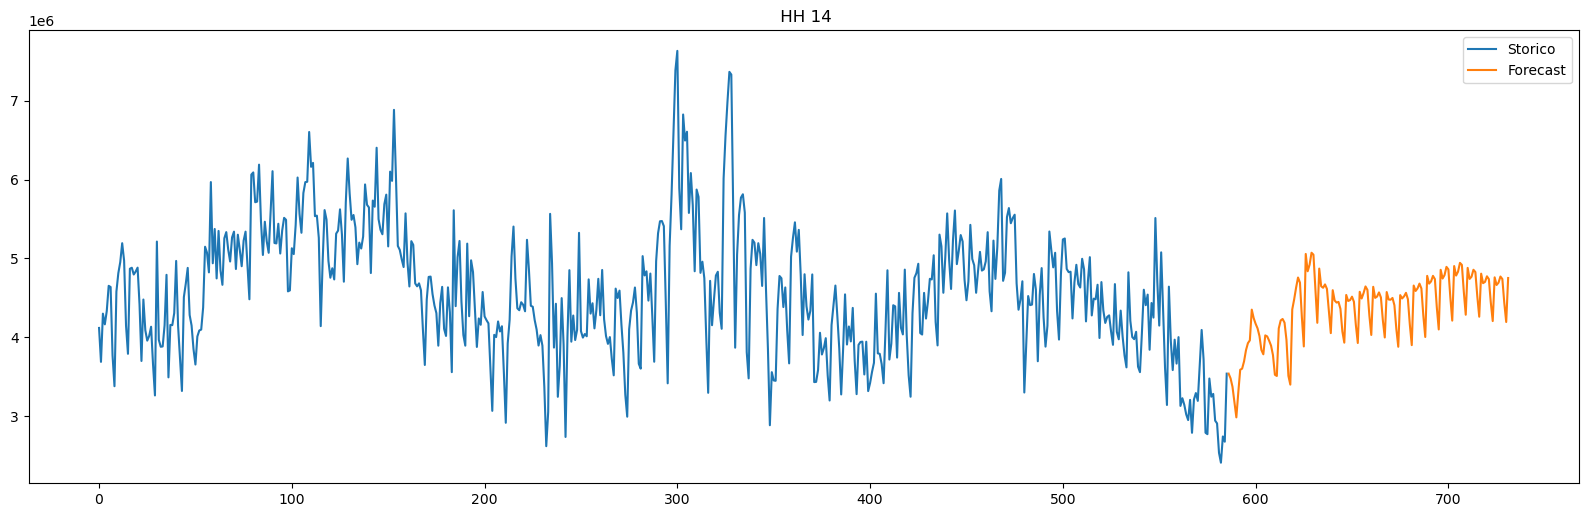

============================================== HH 15 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 172ms/step - loss: 0.0588 - val_loss: 0.1042
Epoch 2/30
13/13 [==============================] - 2s 163ms/step - loss: 0.0602 - val_loss: 0.1311
Epoch 3/30
13/13 [==============================] - 2s 159ms/step - loss: 0.0583 - val_loss: 0.1064
Epoch 4/30
13/13 [==============================] - 2s 161ms/step - loss: 0.0587 - val_loss: 0.1008
Epoch 5/30
13/13 [==============================] - 2s 161ms/step - loss: 0.0563 - val_loss: 0.1152
Epoch 6/30
13/13 [==============================] - 2s 162ms/step - loss: 0.0582 - val_loss: 0.1284
Epoch 7/30
13/13 [==============================] - 2s 161ms/step - loss: 0.0590 - val_loss: 0.1070
Epoch 8/30
13/13 [==============================] - 2s 162ms/step - loss: 0.0581 - val_loss: 0.1218
Epoch 9/30
13/13 [==============================] - 2s 162ms/step - loss: 0.0577 - val_loss: 0.1267

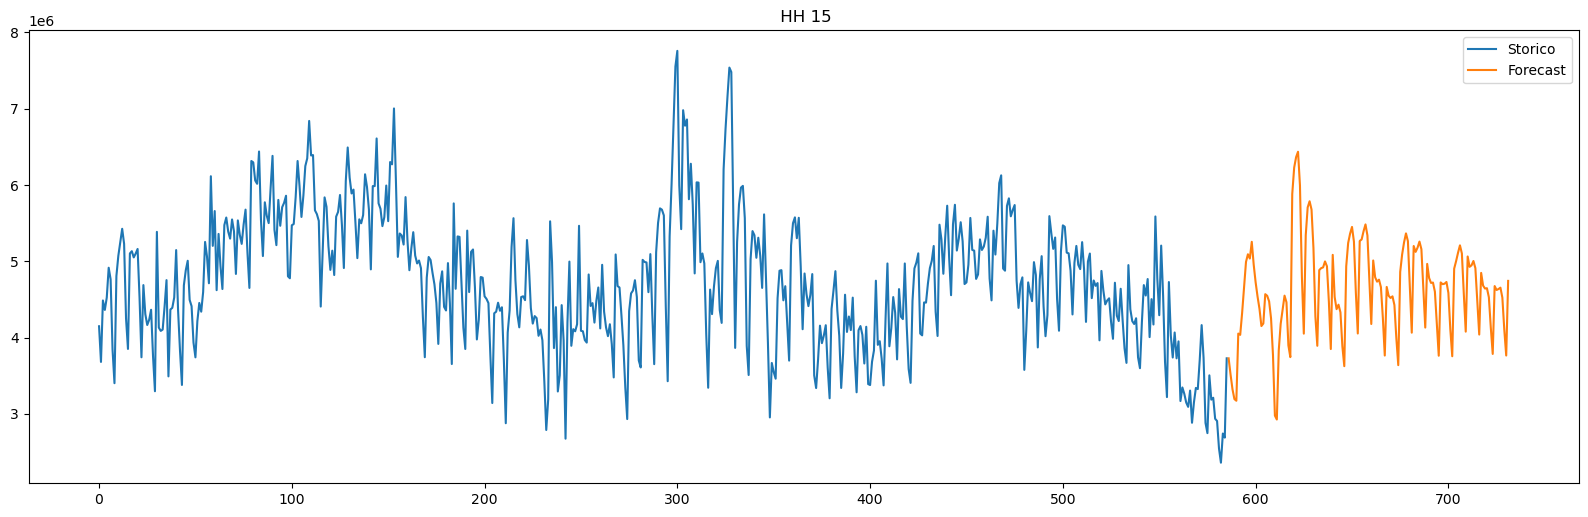

============================================== HH 16 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 166ms/step - loss: 0.0567 - val_loss: 0.1442
Epoch 2/30
13/13 [==============================] - 2s 161ms/step - loss: 0.0560 - val_loss: 0.1291
Epoch 3/30
13/13 [==============================] - 2s 172ms/step - loss: 0.0550 - val_loss: 0.1361
Epoch 4/30
13/13 [==============================] - 2s 166ms/step - loss: 0.0575 - val_loss: 0.1286
Epoch 5/30
13/13 [==============================] - 2s 168ms/step - loss: 0.0541 - val_loss: 0.1415
Epoch 6/30
13/13 [==============================] - 2s 171ms/step - loss: 0.0532 - val_loss: 0.1335
Epoch 7/30
13/13 [==============================] - 2s 170ms/step - loss: 0.0534 - val_loss: 0.1291
Epoch 8/30
13/13 [==============================] - 2s 172ms/step - loss: 0.0554 - val_loss: 0.1221
Epoch 9/30
13/13 [==============================] - 2s 169ms/step - loss: 0.0529 - val_loss: 0.1206

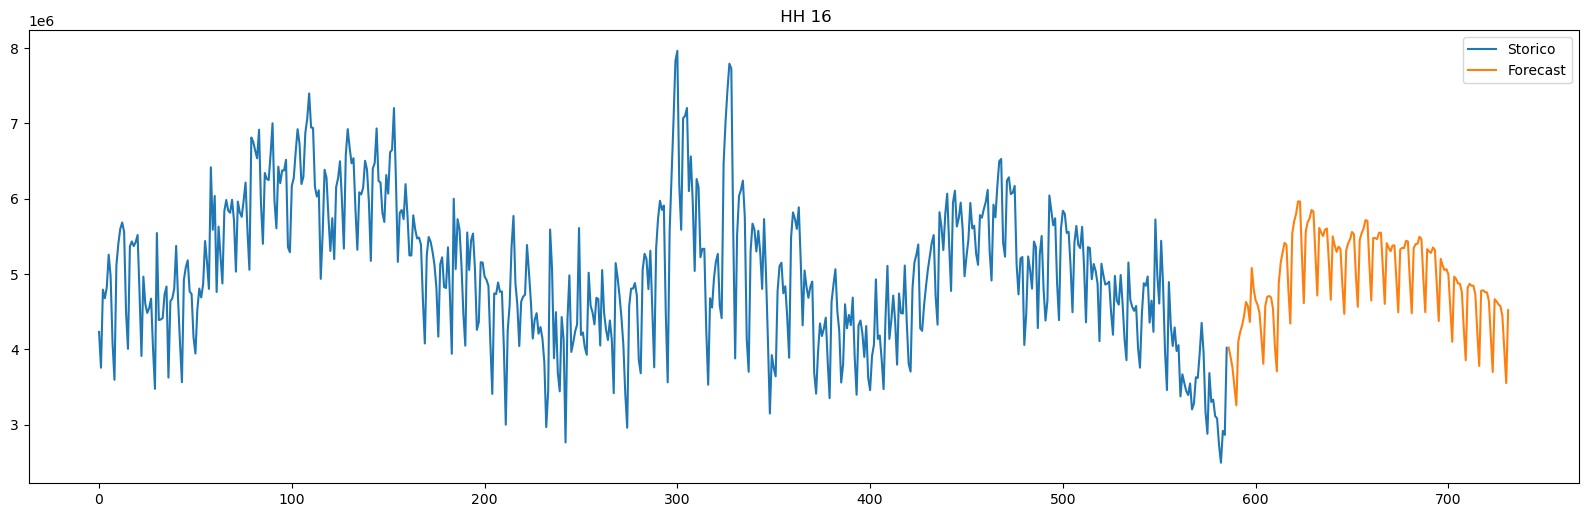

============================================== HH 17 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 171ms/step - loss: 0.0542 - val_loss: 0.1227
Epoch 2/30
13/13 [==============================] - 2s 161ms/step - loss: 0.0538 - val_loss: 0.1393
Epoch 3/30
13/13 [==============================] - 2s 163ms/step - loss: 0.0525 - val_loss: 0.1192
Epoch 4/30
13/13 [==============================] - 2s 161ms/step - loss: 0.0557 - val_loss: 0.1288
Epoch 5/30
13/13 [==============================] - 2s 157ms/step - loss: 0.0516 - val_loss: 0.1341
Epoch 6/30
13/13 [==============================] - 2s 160ms/step - loss: 0.0528 - val_loss: 0.1372
Epoch 7/30
13/13 [==============================] - 2s 160ms/step - loss: 0.0527 - val_loss: 0.1395
Epoch 8/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0513 - val_loss: 0.1266
Epoch 9/30
13/13 [==============================] - 2s 161ms/step - loss: 0.0523 - val_loss: 0.1285

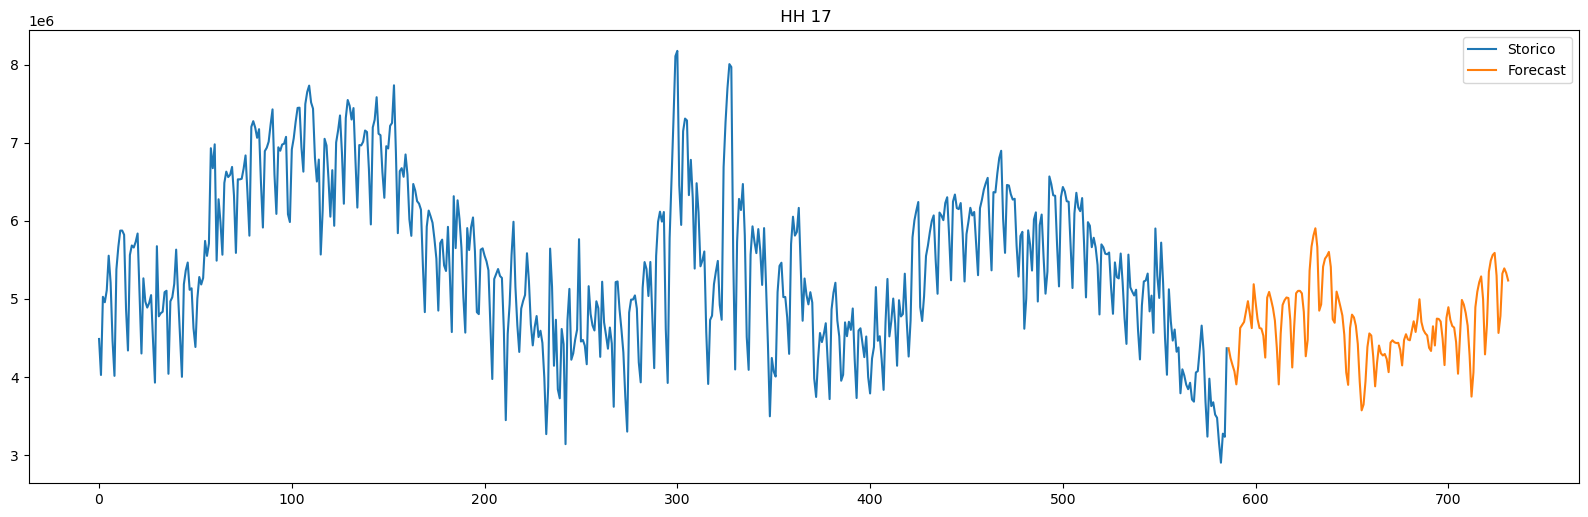

============================================== HH 18 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 167ms/step - loss: 0.0508 - val_loss: 0.1077
Epoch 2/30
13/13 [==============================] - 2s 165ms/step - loss: 0.0534 - val_loss: 0.1143
Epoch 3/30
13/13 [==============================] - 2s 171ms/step - loss: 0.0495 - val_loss: 0.1071
Epoch 4/30
13/13 [==============================] - 2s 159ms/step - loss: 0.0502 - val_loss: 0.0997
Epoch 5/30
13/13 [==============================] - 2s 160ms/step - loss: 0.0502 - val_loss: 0.1132
Epoch 6/30
13/13 [==============================] - 2s 163ms/step - loss: 0.0498 - val_loss: 0.0937
Epoch 7/30
13/13 [==============================] - 2s 156ms/step - loss: 0.0452 - val_loss: 0.1124
Epoch 8/30
13/13 [==============================] - 2s 160ms/step - loss: 0.0519 - val_loss: 0.1068
Epoch 9/30
13/13 [==============================] - 2s 160ms/step - loss: 0.0495 - val_loss: 0.1126

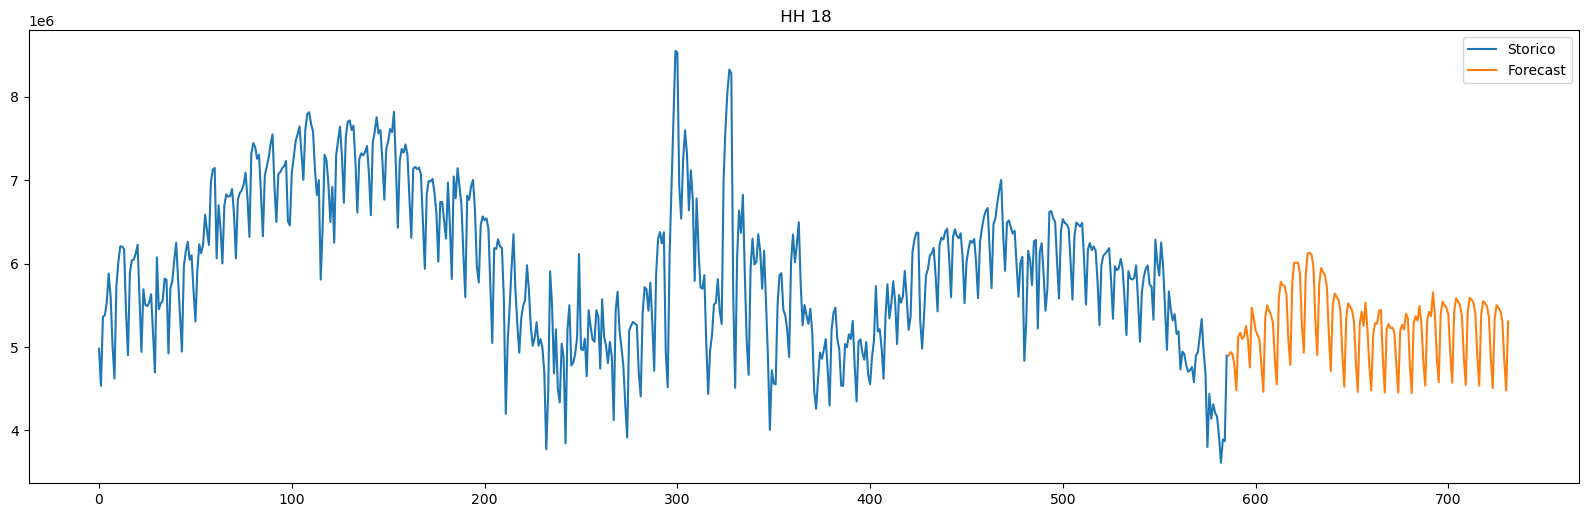

============================================== HH 19 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 177ms/step - loss: 0.0501 - val_loss: 0.1089
Epoch 2/30
13/13 [==============================] - 2s 165ms/step - loss: 0.0470 - val_loss: 0.1002
Epoch 3/30
13/13 [==============================] - 2s 166ms/step - loss: 0.0466 - val_loss: 0.1166
Epoch 4/30
13/13 [==============================] - 2s 168ms/step - loss: 0.0465 - val_loss: 0.1078
Epoch 5/30
13/13 [==============================] - 2s 167ms/step - loss: 0.0438 - val_loss: 0.0953
Epoch 6/30
13/13 [==============================] - 2s 167ms/step - loss: 0.0430 - val_loss: 0.0879
Epoch 7/30
13/13 [==============================] - 2s 167ms/step - loss: 0.0444 - val_loss: 0.0949
Epoch 8/30
13/13 [==============================] - 2s 167ms/step - loss: 0.0430 - val_loss: 0.1070
Epoch 9/30
13/13 [==============================] - 2s 168ms/step - loss: 0.0422 - val_loss: 0.0843

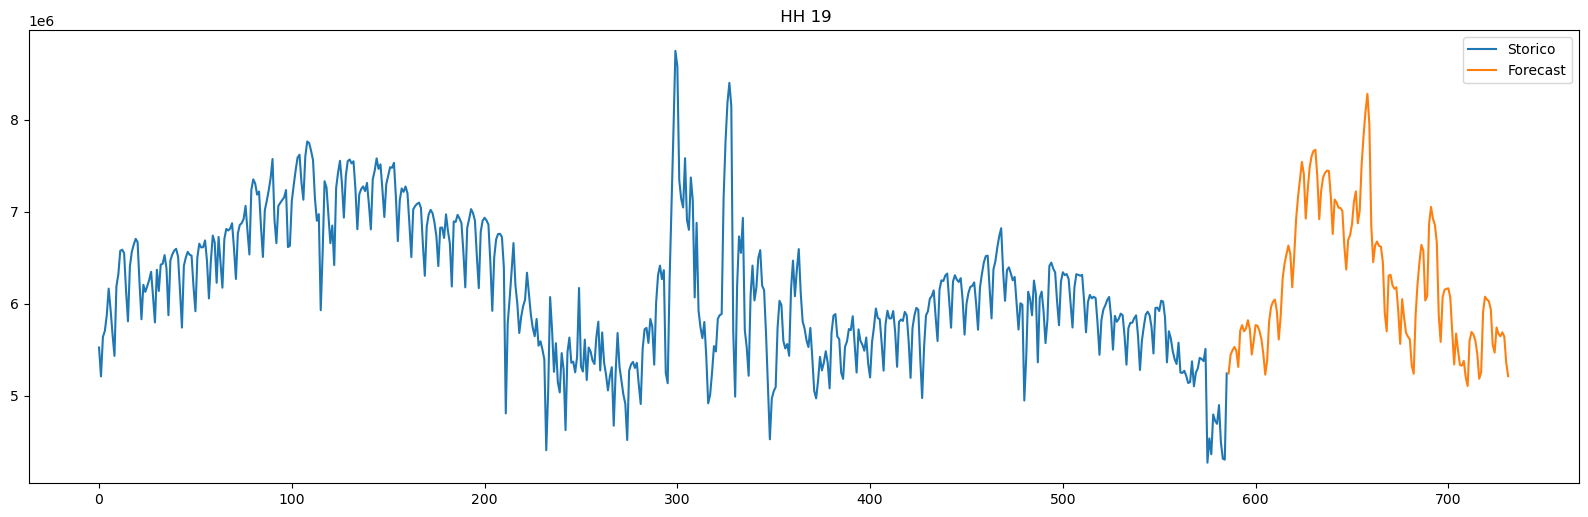

============================================== HH 20 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 172ms/step - loss: 0.0489 - val_loss: 0.1172
Epoch 2/30
13/13 [==============================] - 2s 169ms/step - loss: 0.0418 - val_loss: 0.0809
Epoch 3/30
13/13 [==============================] - 2s 166ms/step - loss: 0.0388 - val_loss: 0.0520
Epoch 4/30
13/13 [==============================] - 2s 166ms/step - loss: 0.0396 - val_loss: 0.0721
Epoch 5/30
13/13 [==============================] - 2s 165ms/step - loss: 0.0396 - val_loss: 0.0583
Epoch 6/30
13/13 [==============================] - 2s 164ms/step - loss: 0.0385 - val_loss: 0.0681
Epoch 7/30
13/13 [==============================] - 2s 163ms/step - loss: 0.0401 - val_loss: 0.0640
Epoch 8/30
13/13 [==============================] - 2s 166ms/step - loss: 0.0387 - val_loss: 0.0524
Epoch 9/30
13/13 [==============================] - 2s 165ms/step - loss: 0.0382 - val_loss: 0.0700

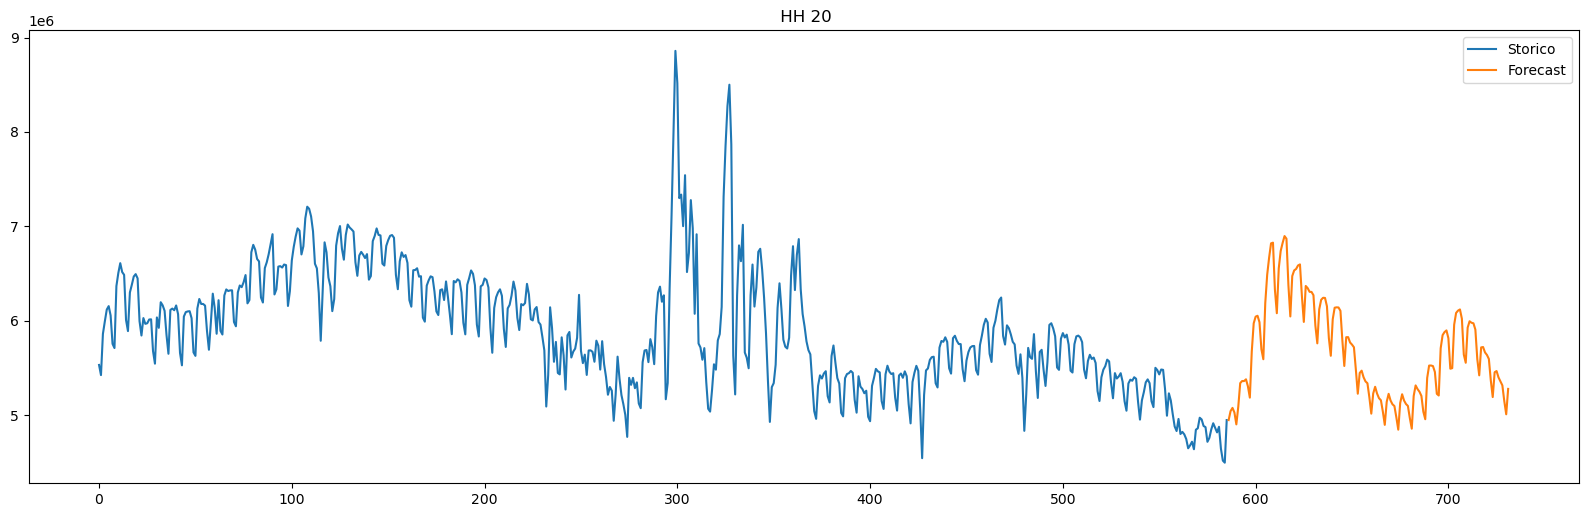

============================================== HH 21 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 172ms/step - loss: 0.0357 - val_loss: 0.0769
Epoch 2/30
13/13 [==============================] - 2s 167ms/step - loss: 0.0335 - val_loss: 0.0712
Epoch 3/30
13/13 [==============================] - 2s 170ms/step - loss: 0.0327 - val_loss: 0.0572
Epoch 4/30
13/13 [==============================] - 2s 167ms/step - loss: 0.0321 - val_loss: 0.0541
Epoch 5/30
13/13 [==============================] - 2s 172ms/step - loss: 0.0319 - val_loss: 0.0649
Epoch 6/30
13/13 [==============================] - 2s 170ms/step - loss: 0.0302 - val_loss: 0.0478
Epoch 7/30
13/13 [==============================] - 2s 166ms/step - loss: 0.0308 - val_loss: 0.0474
Epoch 8/30
13/13 [==============================] - 2s 169ms/step - loss: 0.0319 - val_loss: 0.0396
Epoch 9/30
13/13 [==============================] - 2s 163ms/step - loss: 0.0316 - val_loss: 0.0379

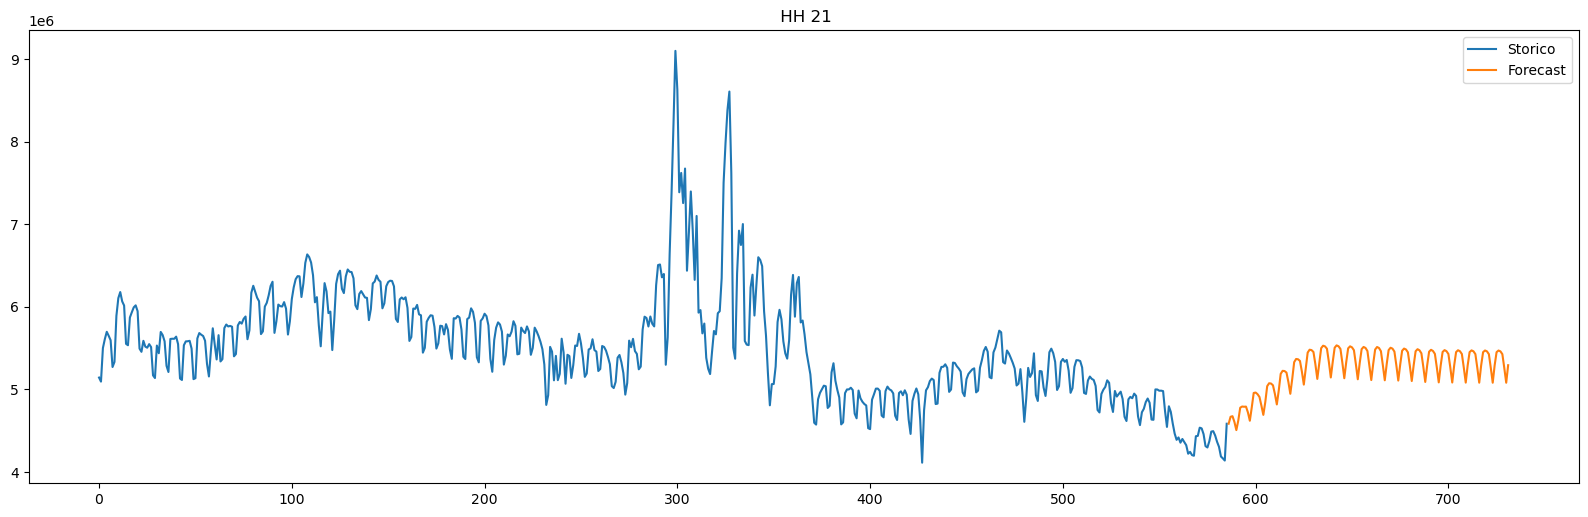

============================================== HH 22 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 175ms/step - loss: 0.0273 - val_loss: 0.0261
Epoch 2/30
13/13 [==============================] - 2s 170ms/step - loss: 0.0295 - val_loss: 0.0534
Epoch 3/30
13/13 [==============================] - 2s 176ms/step - loss: 0.0281 - val_loss: 0.0521
Epoch 4/30
13/13 [==============================] - 2s 164ms/step - loss: 0.0265 - val_loss: 0.0451
Epoch 5/30
13/13 [==============================] - 2s 170ms/step - loss: 0.0276 - val_loss: 0.0588
Epoch 6/30
13/13 [==============================] - 2s 170ms/step - loss: 0.0264 - val_loss: 0.0478
Epoch 7/30
13/13 [==============================] - 2s 177ms/step - loss: 0.0257 - val_loss: 0.0348
Epoch 8/30
13/13 [==============================] - 2s 167ms/step - loss: 0.0255 - val_loss: 0.0364
Epoch 9/30
13/13 [==============================] - 2s 169ms/step - loss: 0.0262 - val_loss: 0.0512

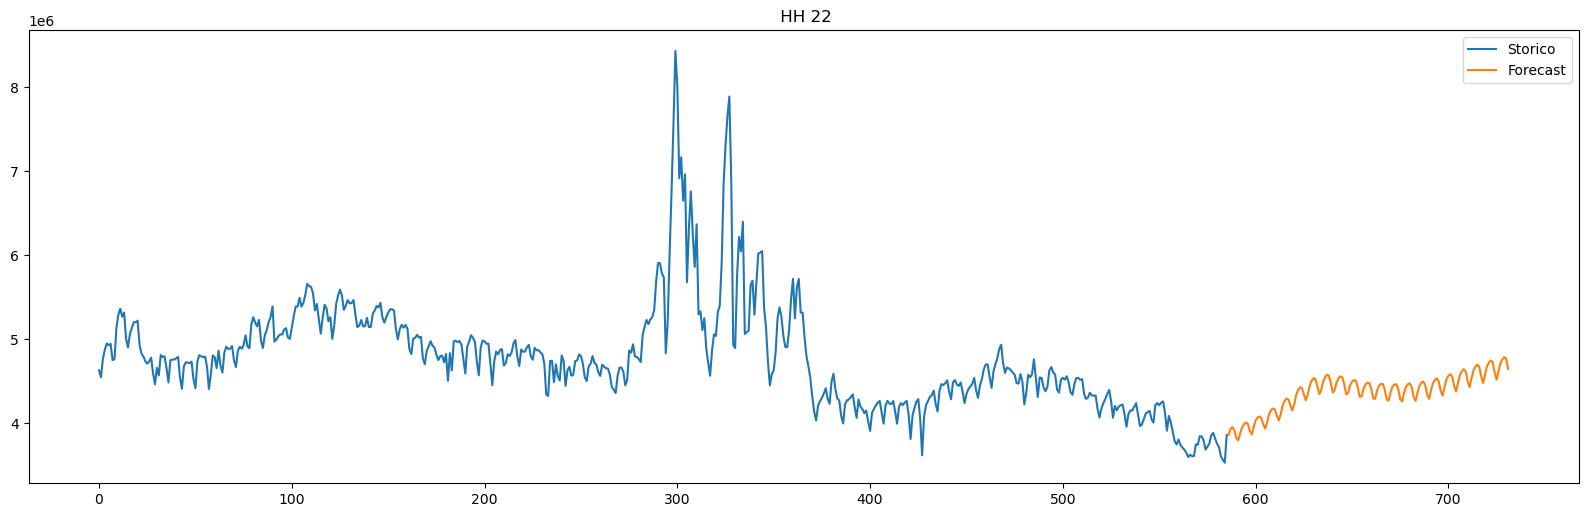

============================================== HH 23 ===============================================
Epoch 1/30
13/13 [==============================] - 2s 164ms/step - loss: 0.0287 - val_loss: 0.0312
Epoch 2/30
13/13 [==============================] - 2s 169ms/step - loss: 0.0299 - val_loss: 0.0263
Epoch 3/30
13/13 [==============================] - 2s 169ms/step - loss: 0.0276 - val_loss: 0.0330
Epoch 4/30
13/13 [==============================] - 2s 173ms/step - loss: 0.0296 - val_loss: 0.0138
Epoch 5/30
13/13 [==============================] - 2s 167ms/step - loss: 0.0294 - val_loss: 0.0478
Epoch 6/30
13/13 [==============================] - 2s 166ms/step - loss: 0.0290 - val_loss: 0.0179
Epoch 7/30
13/13 [==============================] - 2s 170ms/step - loss: 0.0294 - val_loss: 0.0214
Epoch 8/30
13/13 [==============================] - 2s 171ms/step - loss: 0.0283 - val_loss: 0.0290
Epoch 9/30
13/13 [==============================] - 2s 172ms/step - loss: 0.0264 - val_loss: 0.0244

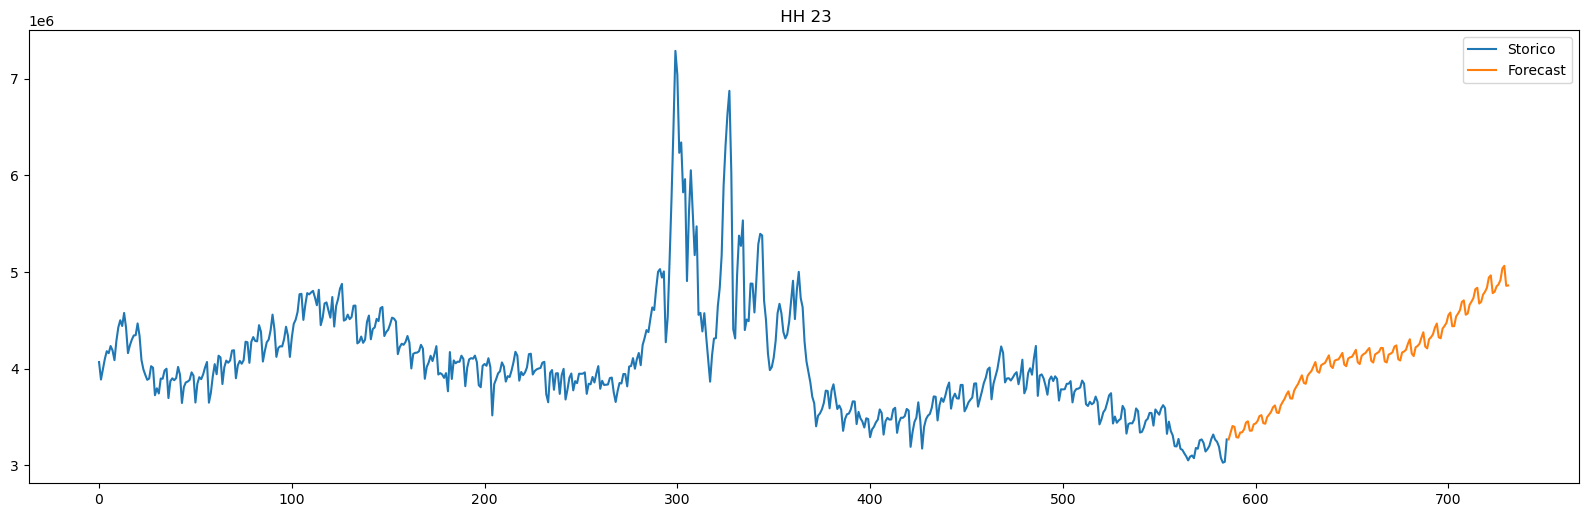

In [148]:
for i in list_hour:
    
    txt = " HH "+str(i)+" "
    x = txt.center(100, "=")
    print(x)

    df = mySeries[i]
    df.columns = ['Y']
    
    # Data normalization
    scaler = MinMaxScaler(feature_range=(0,1))
    df1 = scaler.fit_transform(np.array(df['Y']).reshape(-1,1))

    # splitting dataset into train and test split
    training_size = int(len(df1)*0.8)
    test_size = len(df1) - training_size
    train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

    # reshape into X=t,t+1,t+2,t+n and Y=t+n+1
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)

    # reshape input to be [samples, time steps, features]
    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

    # Fitting model
    model.fit(X_train, y_train, validation_data = (X_test,ytest), epochs=epoche, batch_size=batch, verbose=1)

    # prediction and check performance metrics
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Transformback to original form
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    x_input = test_data[len(test_data) - time_step:].reshape(1,-1)
    temp_input = list(x_input)
    temp_input = temp_input[0].tolist()

    # Prediction for next n days
    lst_output=[]
    le_pred = deltad  
    j = 0
    while(j<le_pred):
        if(len(temp_input)>n_steps):
            x_input=np.array(temp_input[1:])
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            lst_output.extend(yhat.tolist())
            j += 1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            j += 1
        
    day_new = np.arange(1,n_steps+1)
    day_pred = np.arange(n_steps+1,n_steps+1 + le_pred)

    df3 = df1.tolist()
    df3.extend(lst_output)
    df3 = scaler.inverse_transform(df3).tolist()

    Series_prev[i] = pd.DataFrame(data=df3, columns=['Y'])

    figure(figsize=(20, 6), dpi=100)
    plt.plot(df3[: -le_pred+1],  label='Storico')
    plt.plot(day_pred + len(df3) -n_steps -le_pred  , scaler.inverse_transform(lst_output), label = 'Forecast')
    plt.legend(loc='upper right')
    plt.title(' HH '+ str(i))
    plt.show()


In [149]:
l = []
sdate = date(2018, 9, 1) 
edate = date(2020, 8, 31) 
delta = edate - sdate       
for i in range(delta.days + 1):
    day = sdate + timedelta(days=i)
    l.append(day)

In [150]:
list_df_prev = [pd.DataFrame() for x in range(24)]
SeriesPrev = []
namesofMySeriesPrev = []
for i in list_hour:
    list_df_prev[i] = pd.DataFrame(list(zip(l, Series_prev[i]['Y'].values)), columns =['DATA', 'VALORE'])
    list_df_prev[i] = list_df_prev[i].set_index(pd.DatetimeIndex(list_df_prev[i]['DATA']))
    list_df_prev[i] = list_df_prev[i].drop(['DATA'], axis=1)
    SeriesPrev.append(list_df_prev[i])
    namesofMySeriesPrev.append(list_hour[i])

In [151]:
lista1 = []
for i in range(len(SeriesPrev[0])):
    for j in list_hour:
        lista1.append(float(SeriesPrev[j].iloc[i]))

In [152]:
dfcompleto = pd.DataFrame(lista1)

In [153]:
df_cal = pd.DataFrame( {'DATE_TIME': pd.date_range('2018-09-01', '2020-11-01', freq='1H', closed='left')} )

In [154]:
dfcompleto1 = pd.concat([df_cal, dfcompleto], axis=1)
dfcompleto1 = dfcompleto1[['DATE_TIME',0]]
dfcompleto1 = dfcompleto1.set_index('DATE_TIME')
dfcompleto1.columns = ['VALORE']

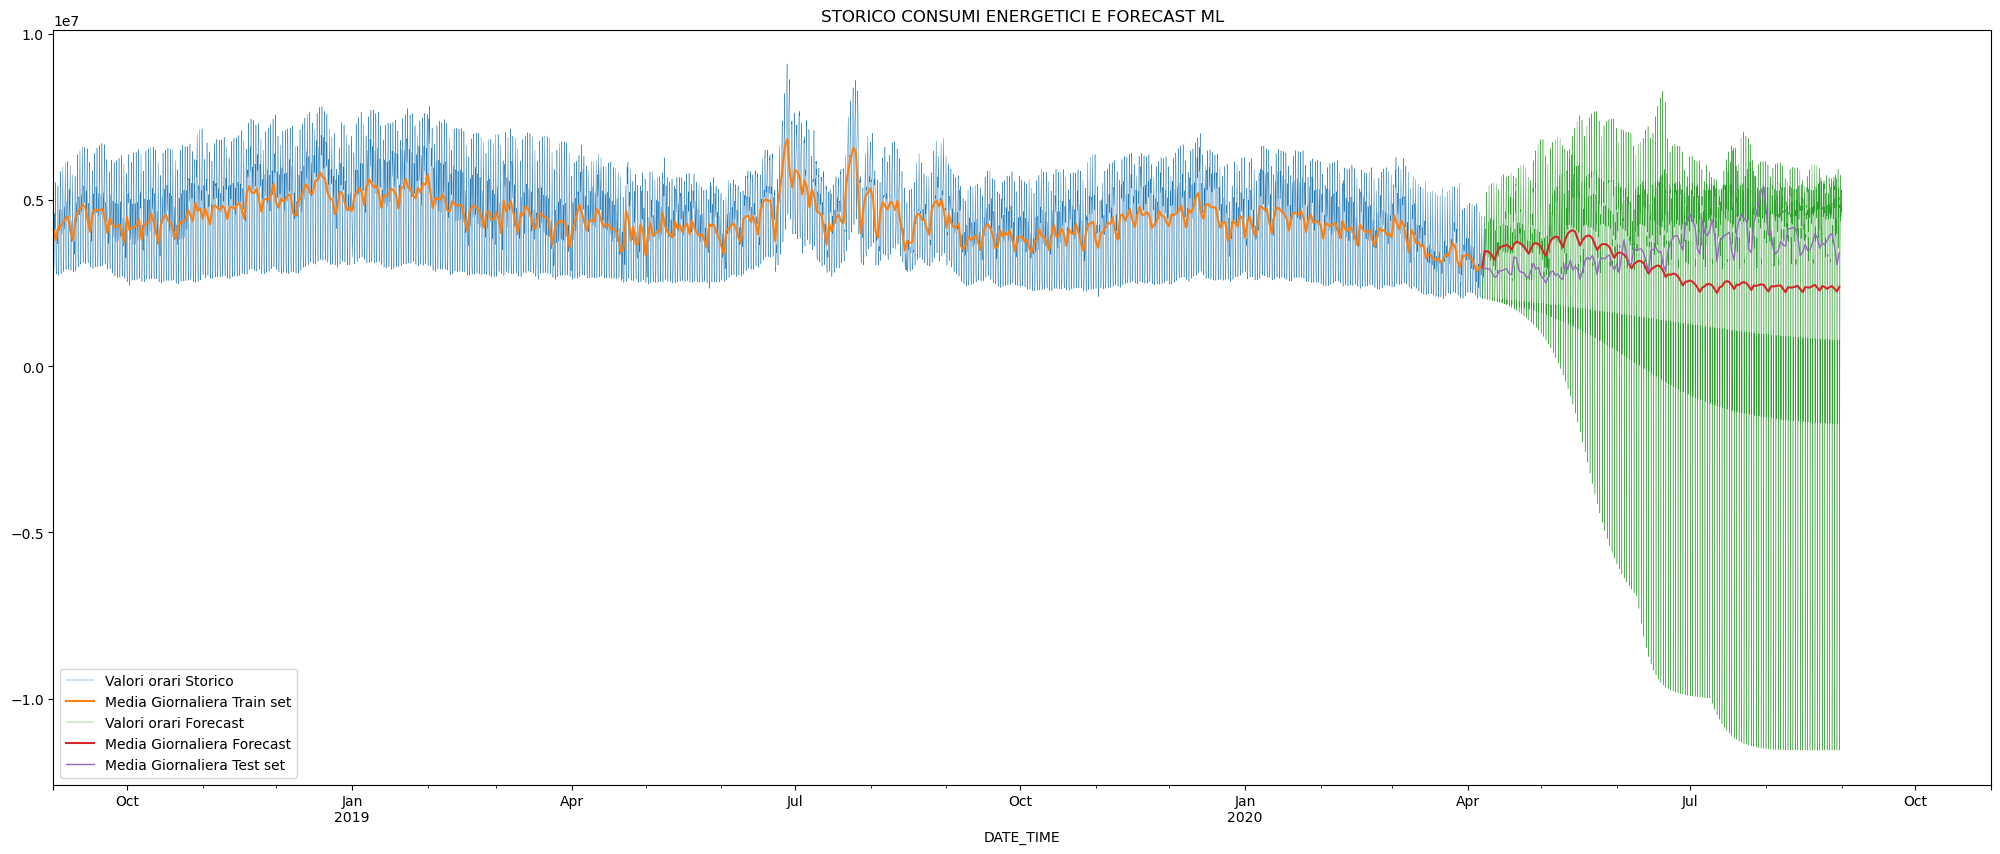

In [155]:
title='STORICO CONSUMI ENERGETICI E FORECAST ML'
ylabel='MW'
xlabel=''
figure(figsize=(25, 10), dpi=100)
dfcompleto1.loc[:'2020-04-07']['VALORE'].plot(legend=True, label='Valori orari Storico' , title=title, linewidth = 0.3)
dfcompleto1.loc[:'2020-04-07']['VALORE'].resample('d').mean().plot(label='Media Giornaliera Train set', legend=True)
dfcompleto1.loc['2020-04-07':]['VALORE'].plot(label='Valori orari Forecast', legend=True, linewidth = 0.3)
dfcompleto1.loc['2020-04-07':]['VALORE'].resample('d').mean().plot(label='Media Giornaliera Forecast', legend=True)
df_c.loc['2020-04-07':]['Y'].resample('d').mean().plot( label='Media Giornaliera Test set', linewidth = 1, legend=True);


In [156]:
df_output = dfcompleto1.copy()
df_output.columns = ['ML']
df_output['Data'] = df_output.index.date
df_output['Ora'] = df_output.index.hour
df_output['Ora'] = df_output['Ora']+1
df_output = df_output[['Data', 'Ora', 'ML']]

In [157]:
mae = mean_absolute_error(df_c.loc['2020-04-08':'2020-08-31']['Y'], df_output.loc['2020-04-08':'2020-08-31']['ML'])
print(f'Valore MAE ML: {mae}')

Valore MAE ML: 1791535.2501717163
